In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

In [2]:
df = pd.read_csv('C:/All Programming/Udamy Ml course/Machine Learning/dataset/mall.csv')

x = df.iloc[:, [3,4]].values

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

**Hierarchical clustering**

In [3]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = cluster.fit_predict(x_scaled)

In [4]:
# Create linkage matrix for dendrogram
linkage_matrix = linkage(x_scaled, method='ward')

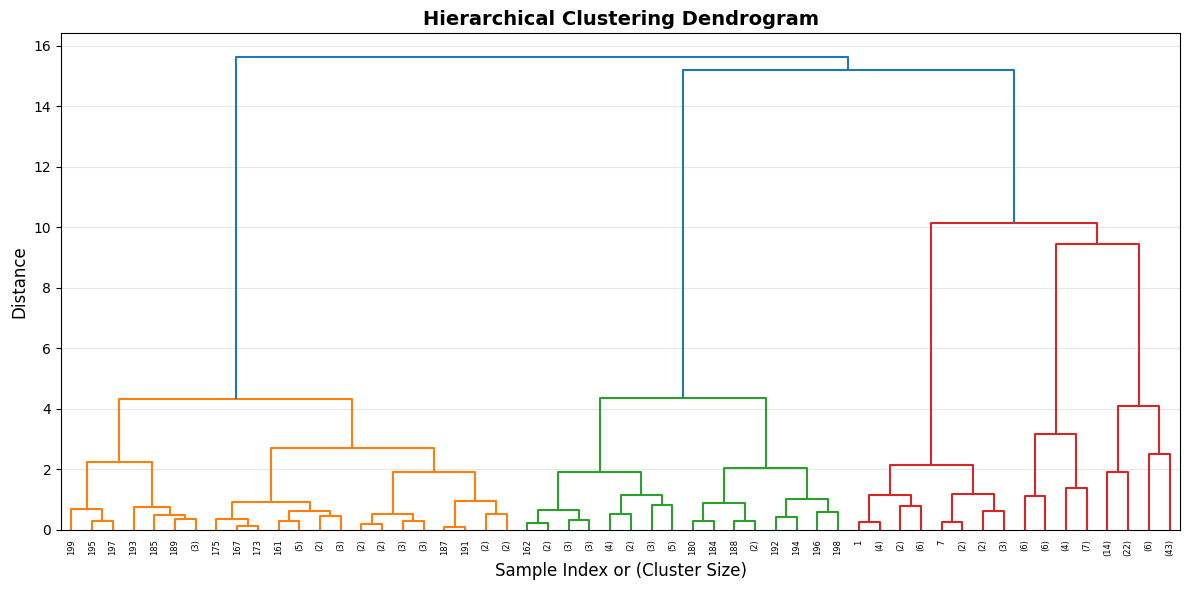

In [5]:
# dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.xlabel('Sample Index or (Cluster Size)', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.title('Hierarchical Clustering Dendrogram', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

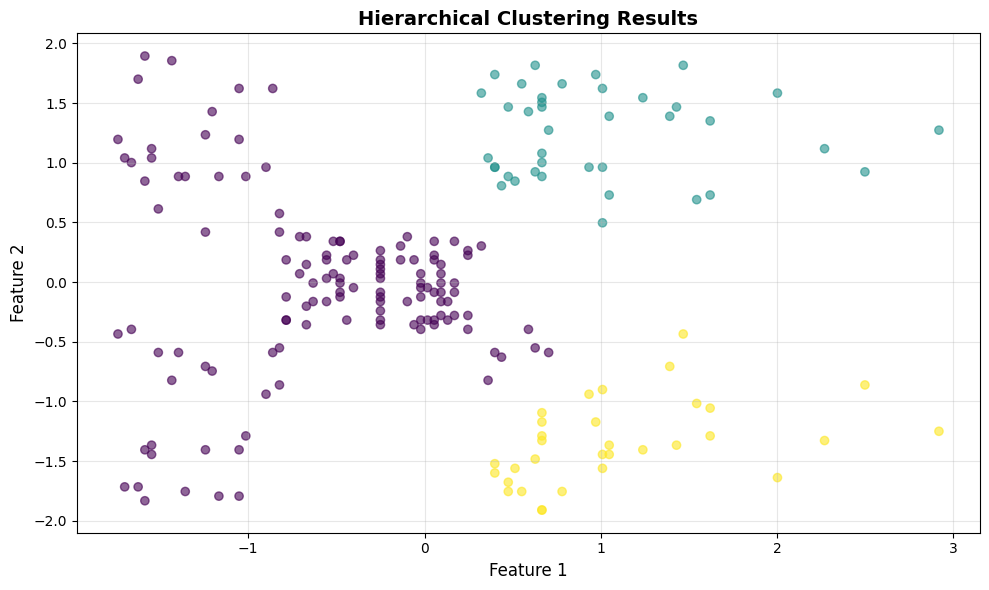

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Hierarchical Clustering Results', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [7]:
silhouette = silhouette_score(x_scaled, labels)
print(f"Silhouette Score: {silhouette:.3f}")

Silhouette Score: 0.461


In [8]:
# Cut dendrogram at different levels
for n_clusters in [2, 3, 4, 5]:
    labels_cut = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    silhouette = silhouette_score(x_scaled, labels_cut)
    print(f"k={n_clusters}: Silhouette Score = {silhouette:.3f}")

k=2: Silhouette Score = 0.384
k=3: Silhouette Score = 0.461
k=4: Silhouette Score = 0.493
k=5: Silhouette Score = 0.554
